# **Supermarket Sales Analysis**

In [23]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [25]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [26]:




df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [27]:
df.shape

(1000, 17)

In [28]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [29]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [30]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [31]:
df["Unit price"]=pd.to_numeric(df["Unit price"],errors='coerce')

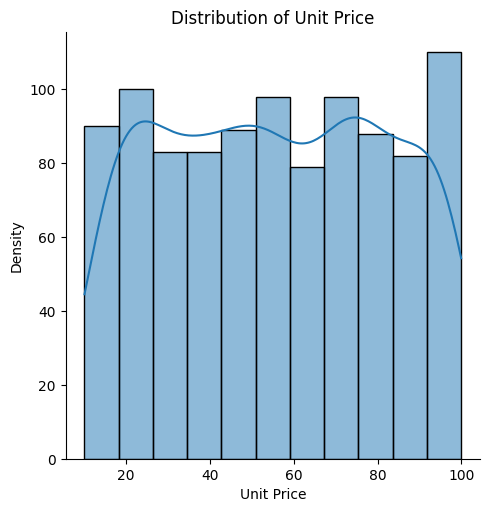

In [32]:
sns.displot(df["Unit price"], kde=True)

plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Density")
plt.show()

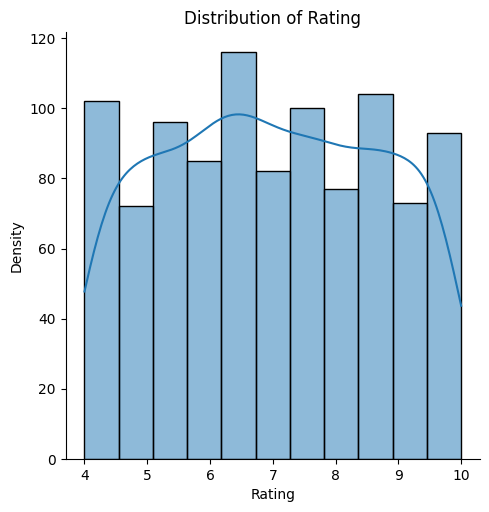

In [33]:
sns.displot(df["Rating"], kde=True)
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()

In [34]:
df['Unit price']=df['Unit price'].fillna(df['Unit price'].mean())
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

# **Unique Values**

In [35]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [36]:

dist={"Invoice ID":"Invoice_ID"}
df.rename(columns=dist,inplace=True)

In [37]:
df = df.loc[:, ~df.columns.duplicated()]


In [38]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [39]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [40]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [41]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [42]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [43]:
a=df['Gender'].value_counts()
print("Total number of Females:",a["Female"])
print("Total number of Males:",a["Male"])

Total number of Females: 501
Total number of Males: 499


In [44]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [45]:
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

# **Statistical observation**

In [46]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# **Data Visualization**

## **Univariate Analysis**

In [47]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [48]:
df.head()

,Invoice_ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


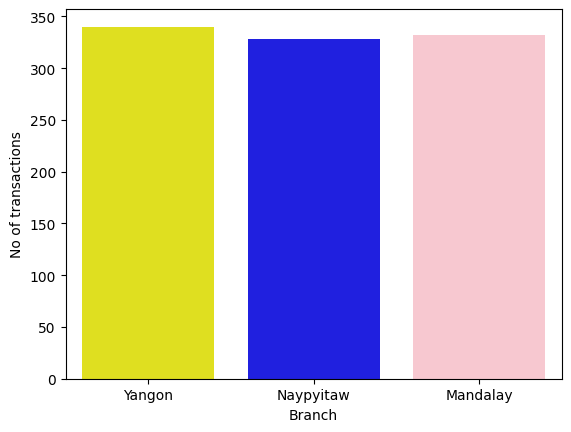

In [49]:
sns.countplot(x="City",hue=df["City"], data=df,palette=["yellow","blue","pink"])
plt.xlabel("Branch")
plt.ylabel("No of transactions")
plt.show()

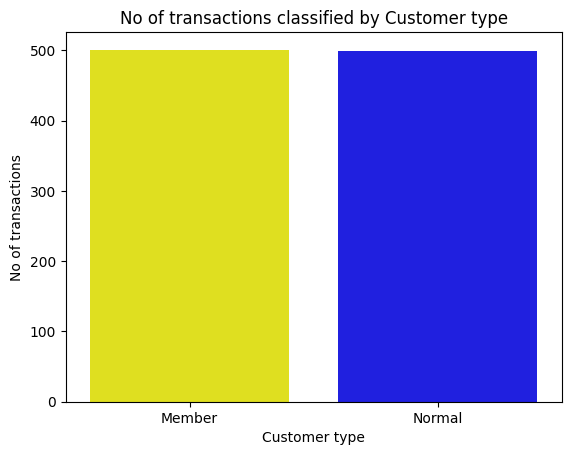

In [50]:
sns.countplot(x="Customer type",hue="Customer type", data=df,palette=["yellow","blue"])
plt.xlabel("Customer type")
plt.ylabel("No of transactions")
plt.title("No of transactions classified by Customer type")
plt.show()

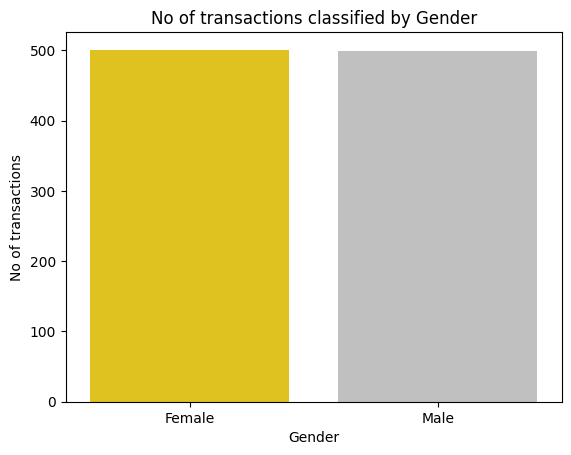

In [51]:
sns.countplot(x="Gender", hue="Gender", data=df,palette=["gold","silver"])
plt.xlabel("Gender")
plt.ylabel("No of transactions")
plt.title("No of transactions classified by Gender")
plt.show()

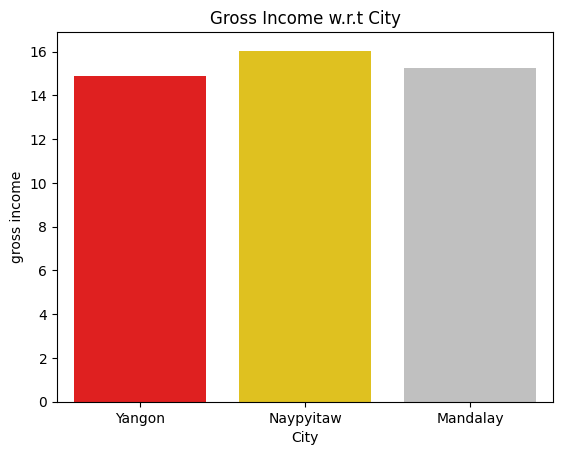

In [52]:
sns.barplot(x='City', y='gross income',hue="City", data=df,errorbar=('ci', False), palette=["red","gold","silver"])
plt.title('Gross Income w.r.t City')
plt.show()

Text(0, 0.5, 'No of transactions')

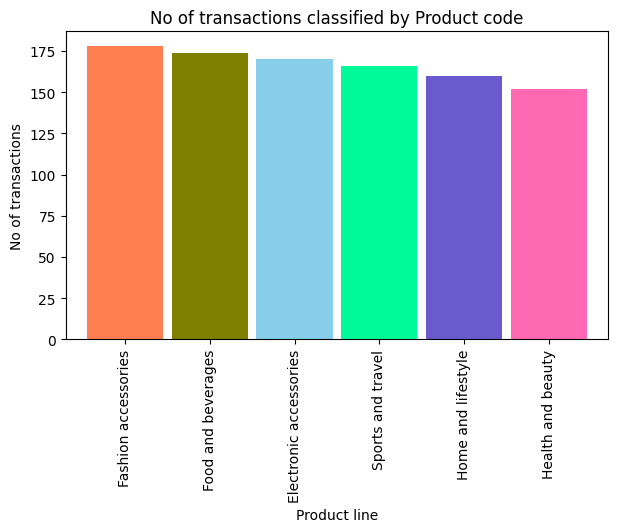

In [53]:
df['Product line'].value_counts().plot(kind='bar',width=0.9,
                                    figsize=(7,4),
                                    title="No of transactions classified by Product code",color=['coral','olive','skyblue','mediumspringgreen','slateblue','hotpink'])
plt.xlabel("Product line")
plt.ylabel("No of transactions")

In [54]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

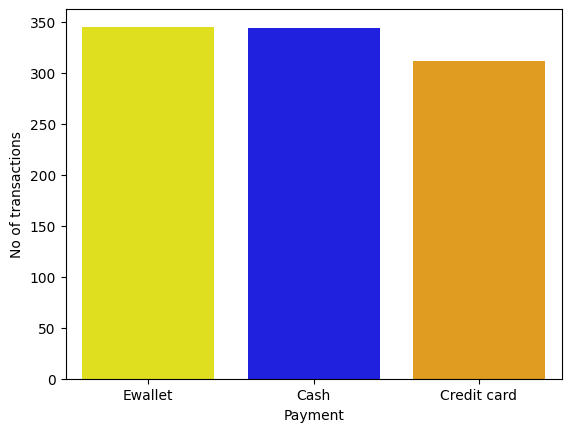

In [55]:
sns.countplot(x="Payment",hue="Payment",data=df,palette=["yellow","blue","orange"])
plt.xlabel("Payment")
plt.ylabel("No of transactions")
plt.show()

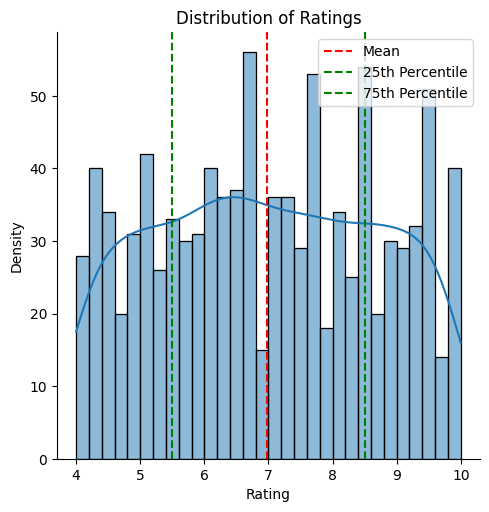

Skewness of Ratings: 0.00900964876573073


In [56]:



sns.displot(df['Rating'], kde=True, bins=30)
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='Mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--', label='25th Percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--', label='75th Percentile')

plt.legend(loc="upper right")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


print("Skewness of Ratings:", df['Rating'].skew())


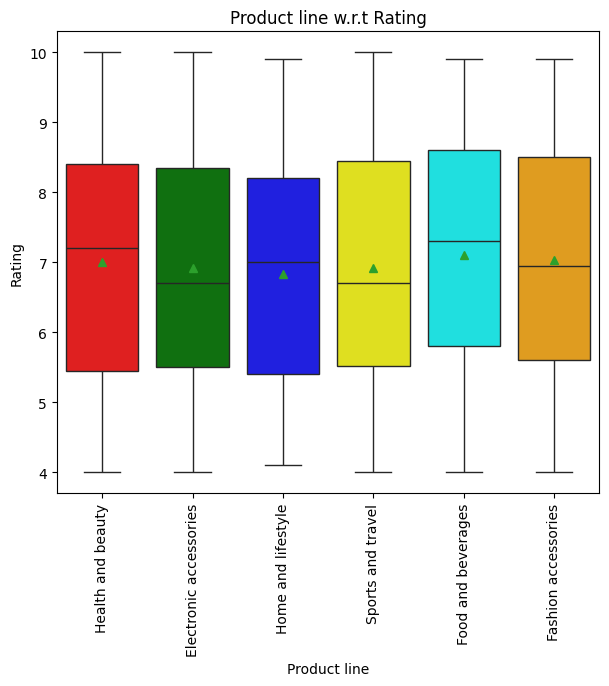

In [57]:
plt.figure(figsize=(7,6))
sns.boxplot(x=df['Product line'],y=df['Rating'],showmeans=True,hue=df['Product line'],palette=["red", "green", "blue", "yellow", "cyan","orange"])
plt.title("Product line w.r.t Rating")
plt.xticks(rotation=90)
plt.show()

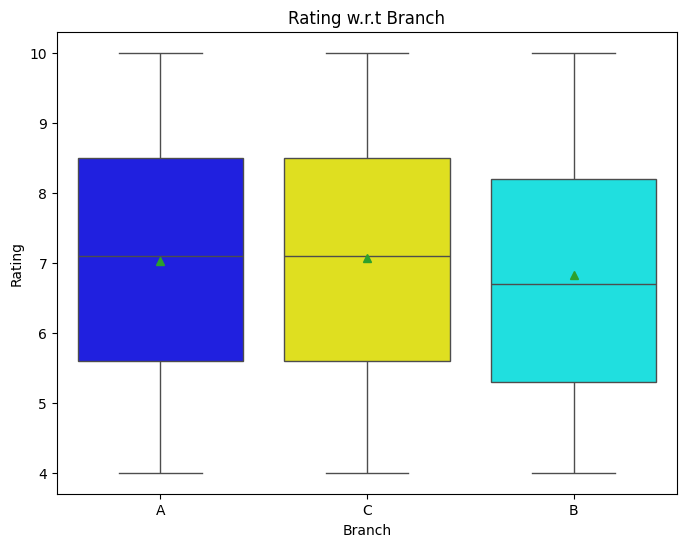

In [58]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    x=df["Branch"],
    y=df["Rating"],hue=df["Branch"],
    showmeans=True,
    palette=["blue", "yellow", "cyan"]
)

plt.title("Rating w.r.t Branch")
plt.show()

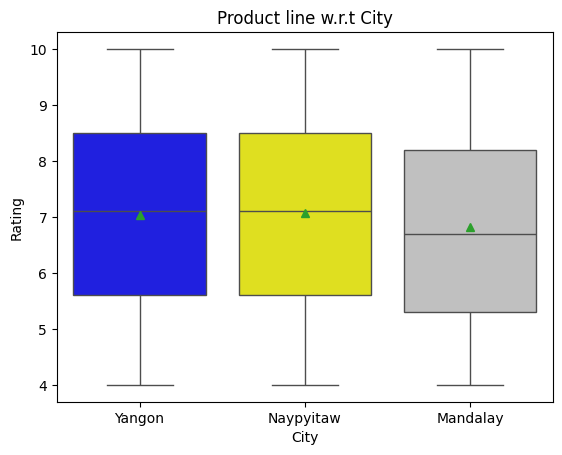

In [59]:
sns.boxplot(x=df["City"],y=df["Rating"],hue=df["City"],data=df,showmeans=True,palette=["blue","yellow", "silver"])
plt.title("Product line w.r.t City")
plt.show()

In [60]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

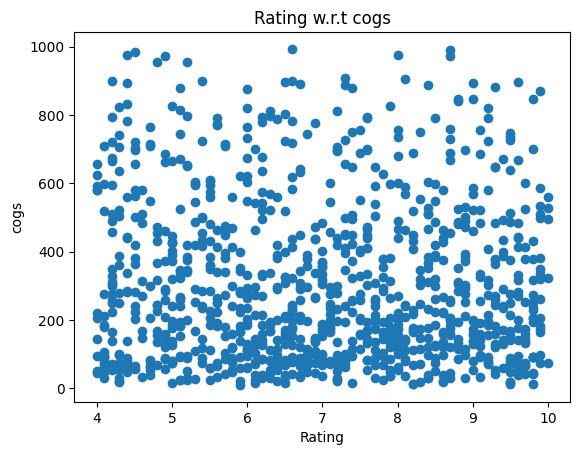

In [61]:
plt.scatter(df['Rating'], df['cogs'])
plt.xlabel('Rating')
plt.ylabel('cogs')
plt.title('Rating w.r.t cogs')
plt.show()

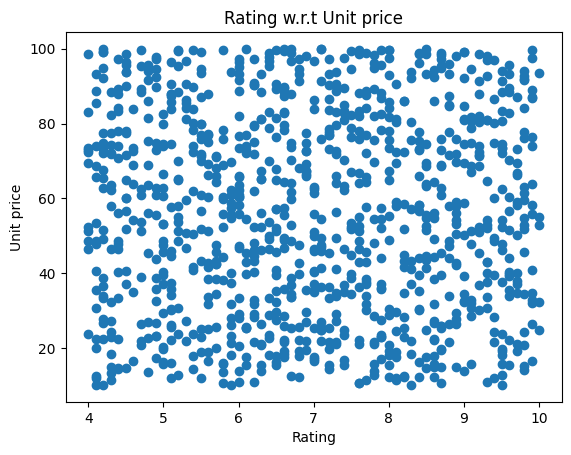

In [62]:
plt.scatter(df['Rating'], df['Unit price'])
plt.xlabel('Rating')
plt.ylabel('Unit price')
plt.title('Rating w.r.t Unit price')
plt.show()

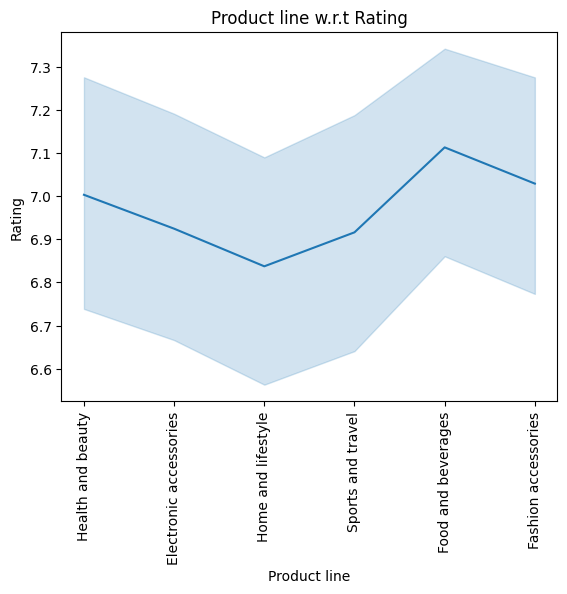

In [63]:

sns.lineplot(x="Product line",y="Rating",data=df)
plt.xticks(rotation=90)
plt.title("Product line w.r.t Rating")
plt.show()

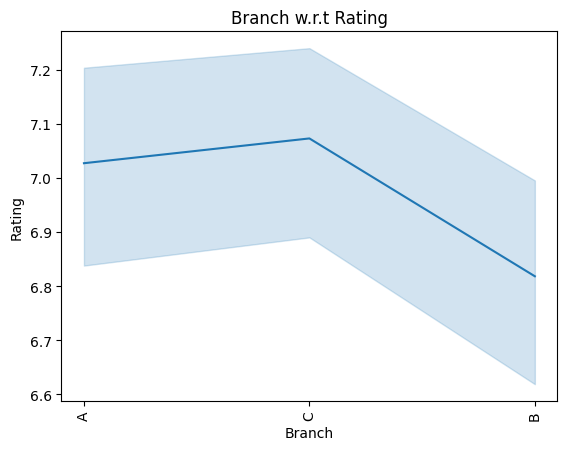

In [64]:
sns.lineplot(x="Branch",y="Rating",data=df)
plt.xticks(rotation=90)
plt.title("Branch w.r.t Rating")

plt.show()

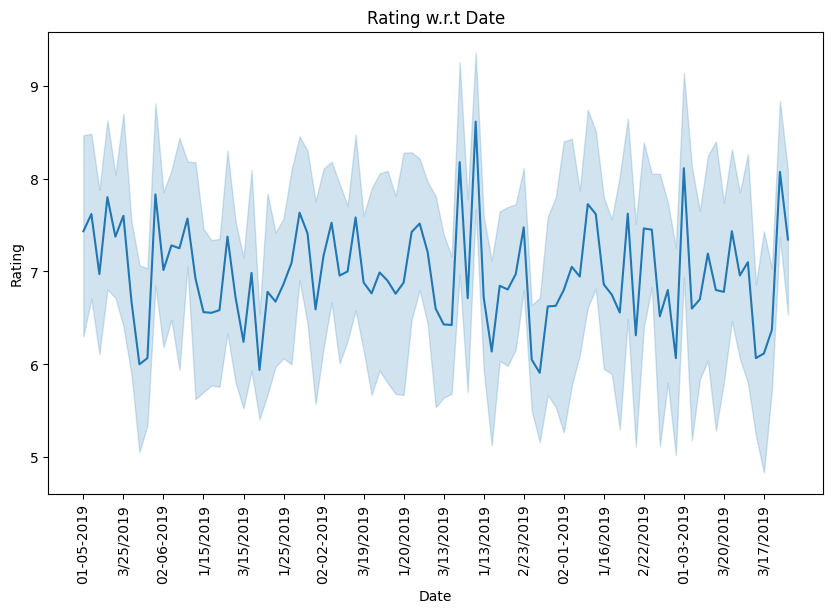

In [65]:
plt.figure(figsize=(10, 6))

sns.lineplot(x="Date", y="Rating", data=df)
plt.xticks(plt.gca().get_xticks()[::5], rotation=90)
plt.title("Rating w.r.t Date")
plt.show()


# **Gross Income inspection**

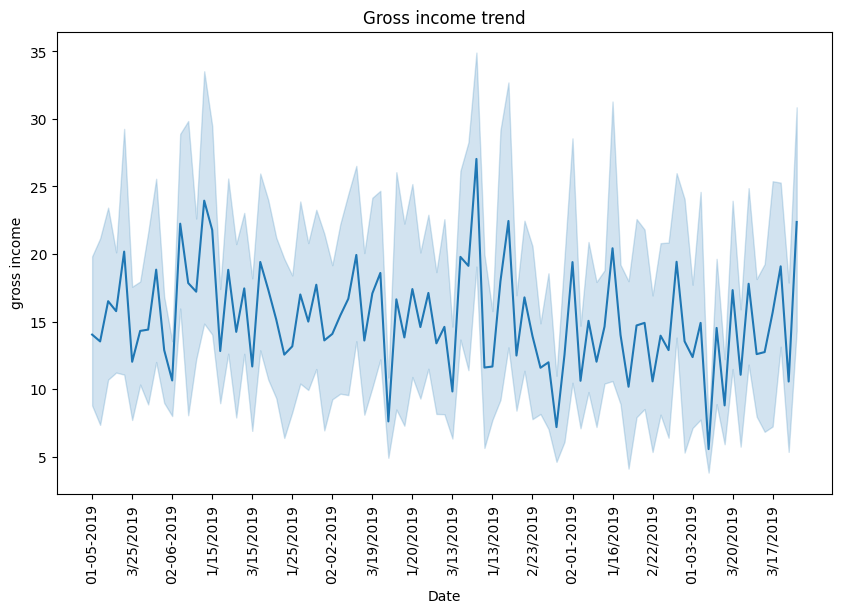

In [66]:
plt.figure(figsize=(10, 6))

sns.lineplot(x="Date", y="gross income", data=df)
plt.xticks(plt.gca().get_xticks()[::5], rotation=90)
plt.title("Gross income trend")
plt.show()


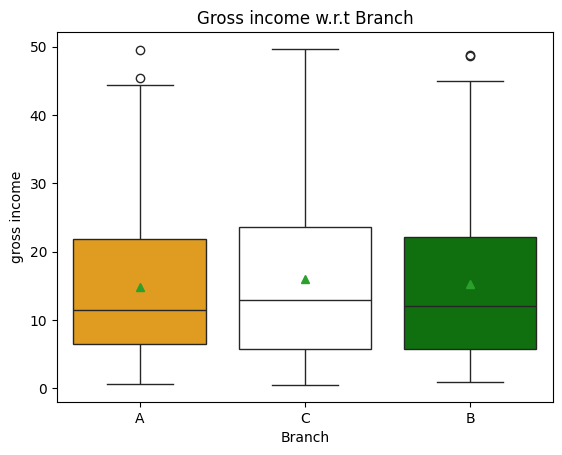

In [67]:
sns.boxplot(x=df["Branch"],y=df["gross income"],hue=df["Branch"],showmeans=True,data=df,palette=["orange","white","green"])
plt.title("Gross income w.r.t Branch")
plt.show()

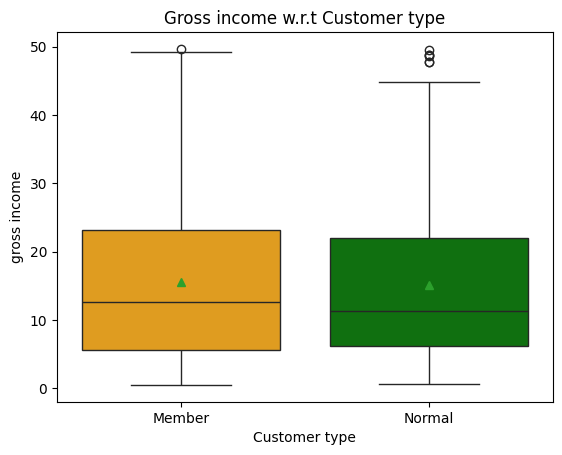

In [68]:
sns.boxplot(x=df["Customer type"],y=df["gross income"],hue=df["Customer type"],data=df,showmeans=True,palette=["orange","green"])
plt.title("Gross income w.r.t Customer type")
plt.show()

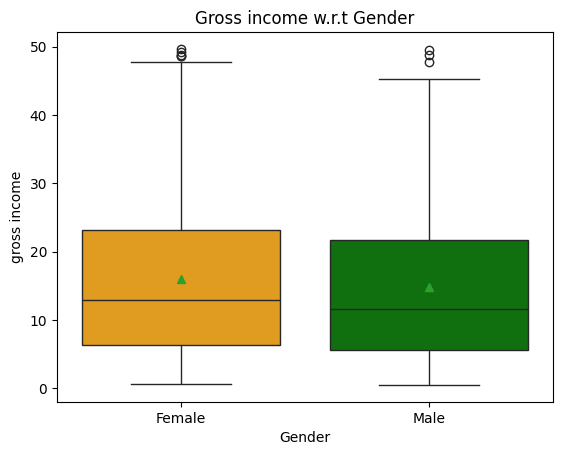

In [69]:
sns.boxplot(x=df["Gender"],y=df["gross income"],hue=df["Gender"],data=df,showmeans=True,palette=["orange","green"])
plt.title("Gross income w.r.t Gender")
plt.show()

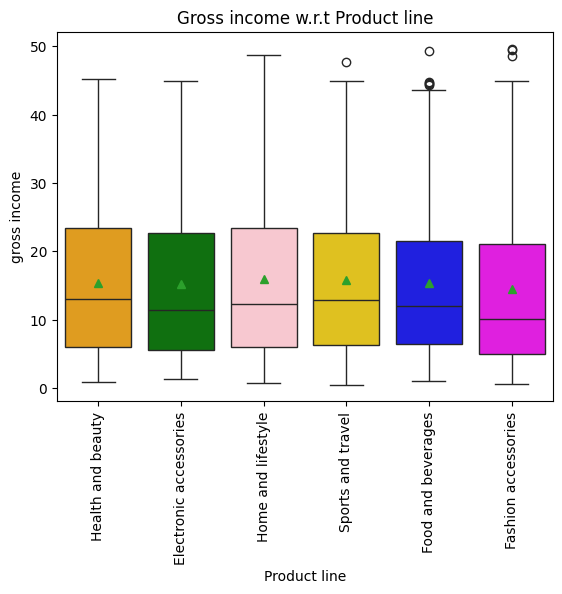

In [83]:

sns.boxplot(x=df["Product line"],y=df["gross income"], hue=df["Product line"],data=df,showmeans=True,palette=["orange","green","pink","gold","blue","magenta"])
plt.title("Gross income w.r.t Product line")
plt.xticks(rotation=90)
plt.show()


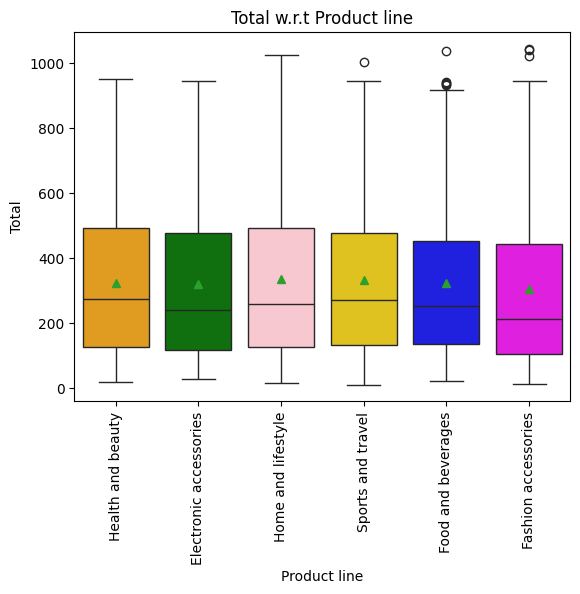

In [82]:
sns.boxplot(y=df["Total"],x=df["Product line"],hue=df["Product line"],showmeans=True,palette=["orange","green","pink","gold","blue","magenta"])
plt.title("Total w.r.t Product line")
plt.xticks(rotation=90)
plt.show()

# **Quantity inspection**

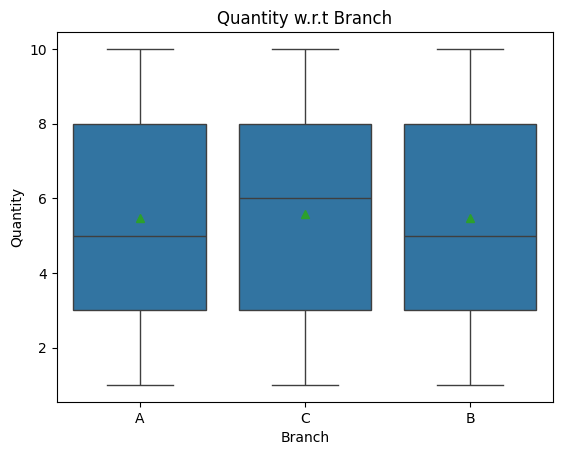

In [81]:
sns.boxplot(x=df["Branch"],y=df["Quantity"],showmeans=True,data=df,)
plt.title("Quantity w.r.t Branch")
plt.show()

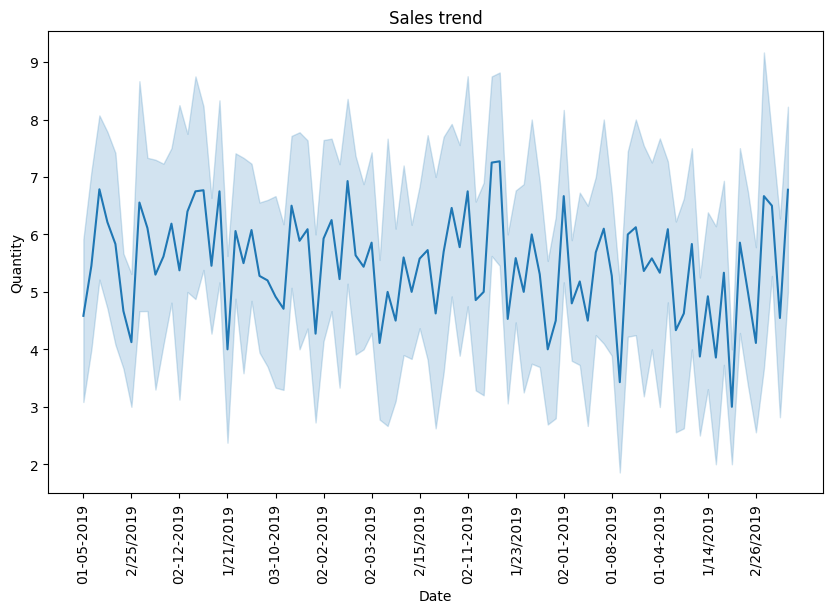

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date",y="Quantity",data=df)
plt.xticks(plt.gca().get_xticks()[::6], rotation=90)
plt.title("Sales trend")
plt.show()

In [74]:
Product_sales= df.groupby(['Product line'])['Quantity'].sum().to_frame()
Product_sales=Product_sales.reset_index()

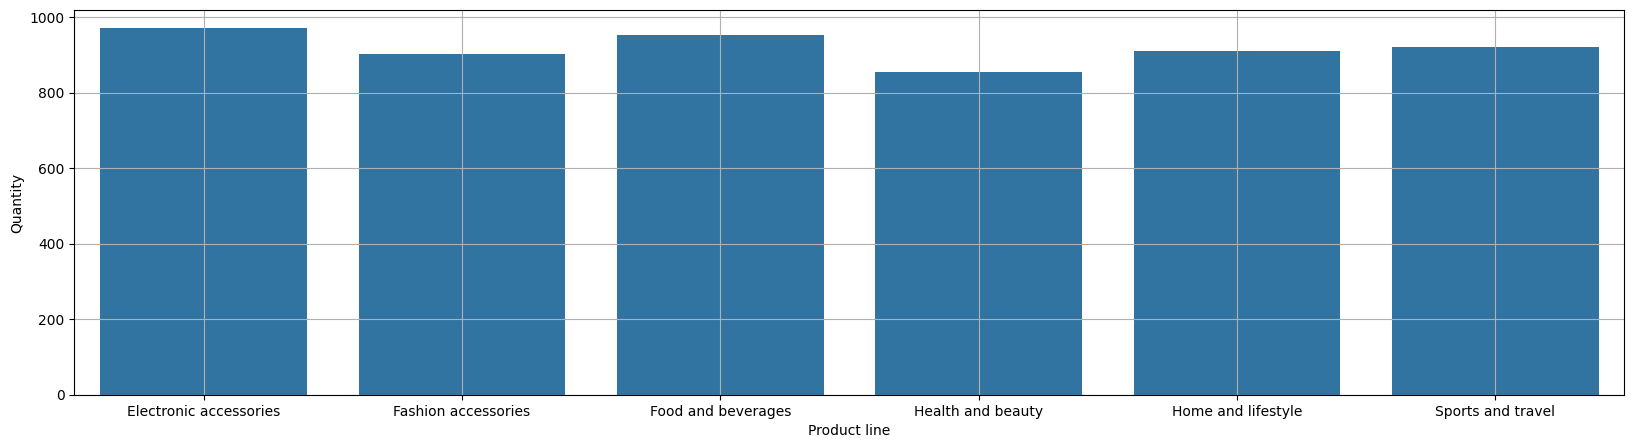

In [75]:


fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="Product line", y="Quantity", data=Product_sales)
plt.grid()

In [92]:
df['weekday'] = df['Date'].dt.dayofweek     #extract Weekdays from Date
df['weekday'].unique()


array([ 2.,  5.,  6., nan,  4.,  1.,  0.,  3.])

In [95]:
# Convert 'Date' column to datetime without specifying a format, letting Pandas infer the format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Remove rows where 'Date' is NaT (invalid dates)
df = df.dropna(subset=['Date'])

# Now you can extract weekdays
df['weekday'] = df['Date'].dt.dayofweek
df['weekday'].unique()


array([2, 5, 6, 4, 1, 0, 3], dtype=int32)

In [100]:
df.head()

,Invoice_ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,76.40,4.761905,3.8200,9.6,5
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,4.761905,30.2085,5.3,4
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-10-01,17:15,Credit card,72.52,4.761905,3.6260,7.2,1


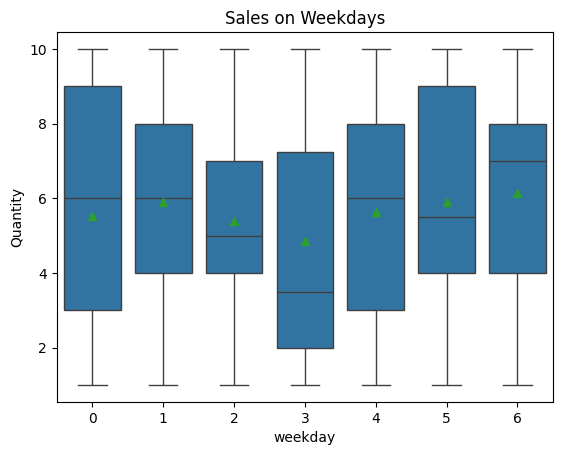

In [102]:
sns.boxplot(x=df['weekday'],y=df["Quantity"],data=df,showmeans=True)
plt.title("Sales on Weekdays")

plt.show()

In [103]:
df['Time']=df['Time'].astype('str')
df['Hour'] = df['Time'].str[:2]
df['Hour']=df['Hour'].astype('int')

In [114]:
def f(x):
  if x>4 and x<=8:
    return 'Early Morning'
  elif x>8 and x<=12:
    return "Morning"
  elif x>12 and x<=16:
    return "Afternoon"
  elif x>16 and x<=20:
    return "Evening"
  elif (x > 20) and (x <= 24):
    return "Night"
  else:
    return "Last Night"
df["session"]=df["Hour"].apply(f)



In [115]:
df.head()

,Invoice_ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,Hour,session
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,76.40,4.761905,3.8200,9.6,5,10,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,13,Afternoon
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,4.761905,30.2085,5.3,4,10,Morning
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-10-01,17:15,Credit card,72.52,4.761905,3.6260,7.2,1,17,Evening


In [118]:

dist_session=df.groupby(['session'])['Quantity'].sum().to_frame()

dist_session=dist_session.reset_index()

Sales=dist_session.Quantity
Session=dist_session.session

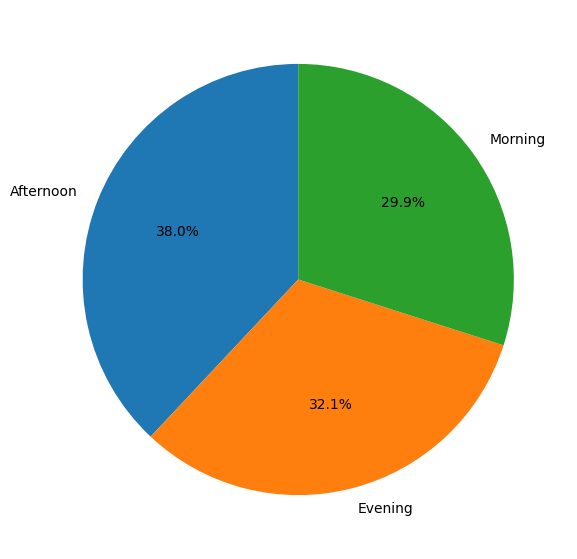

In [121]:
fig = plt.figure(figsize =(10, 7))

plt.pie(Sales, autopct='%1.1f%%',labels = Session, startangle=90)
plt.show()

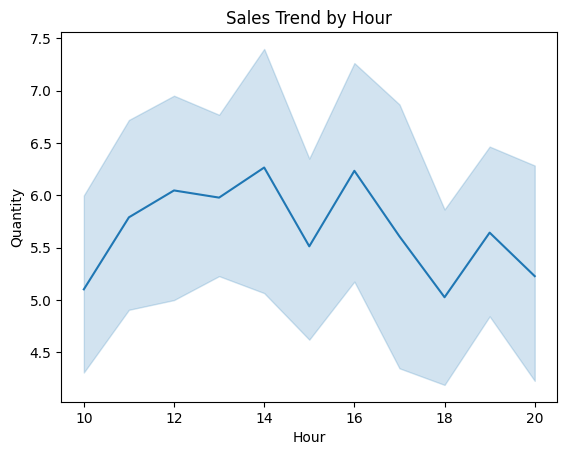

In [130]:
sns.lineplot(x=df["Hour"],y=df["Quantity"])
plt.title("Sales Trend by Hour")
plt.show()

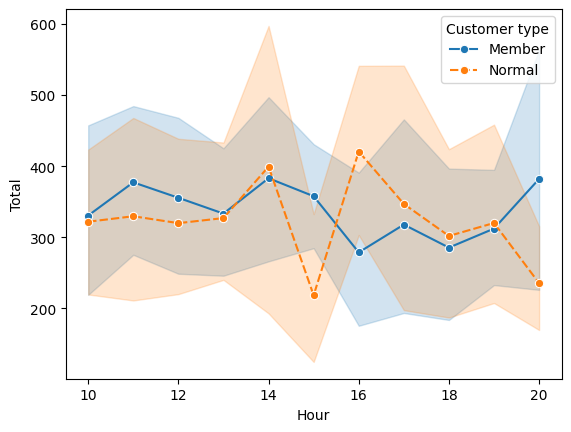

In [140]:
sns.lineplot(data=df,x='Hour',y='Total',hue='Customer type',marker="o",style='Customer type');

In [161]:

Branch_sales= df.groupby(['Branch','Product line'])['Quantity'].sum().to_frame()
Branch_sales=Branch_sales.reset_index()

<Axes: xlabel='Branch', ylabel='Quantity'>

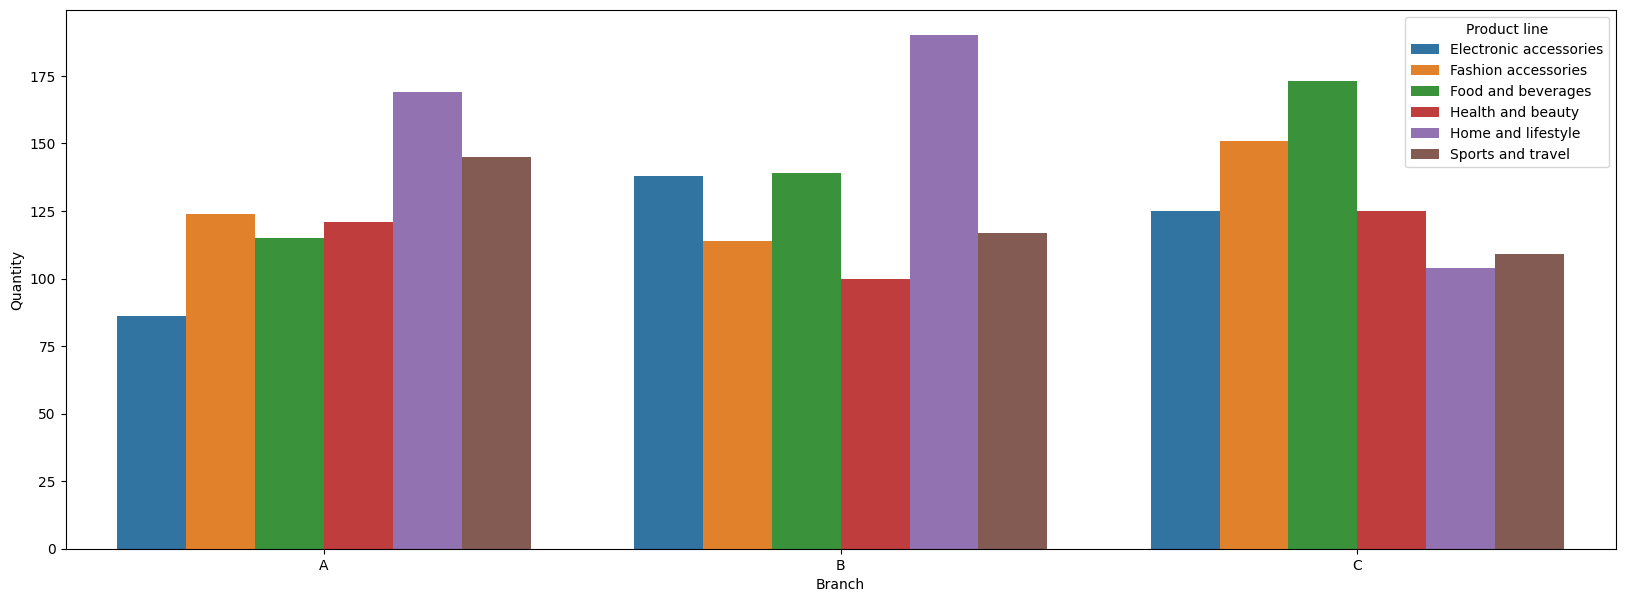

In [162]:
plt.figure(figsize=(20, 7))
sns.barplot(x="Branch", y="Quantity", data=Branch_sales, hue="Product line")


In [167]:

session_sales= df.groupby(['session','Product line'])['Quantity'].sum().to_frame()

session_sales=session_sales.reset_index()

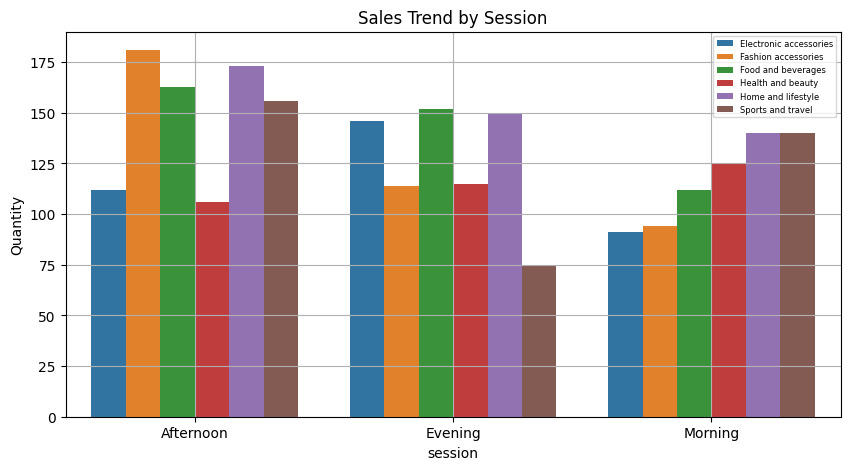

In [184]:
plt.subplots(figsize=(10,5))
sns.barplot(x="session",y="Quantity",data=session_sales,hue="Product line")
plt.title("Sales Trend by Session")
plt.grid()
plt.legend(loc="upper right",fontsize=6)
plt.show()



In [188]:
Gender_sales=df.groupby(["Gender","Product line"])["Quantity"].sum().to_frame()

Gender_sales=Gender_sales.reset_index()

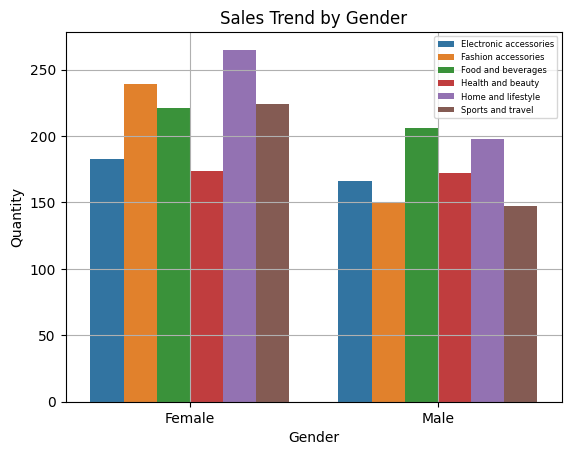

In [193]:
sns.barplot(x="Gender",y="Quantity",data=Gender_sales,hue="Product line")
plt.title("Sales Trend by Gender")
plt.legend(loc="upper right",fontsize=6)
plt.grid()
plt.show()



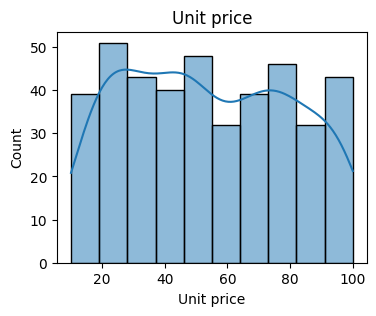

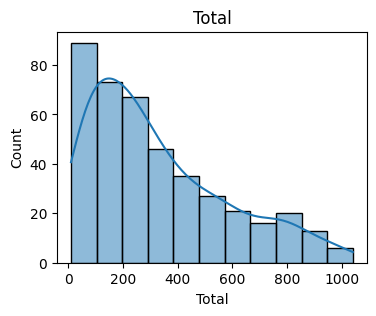

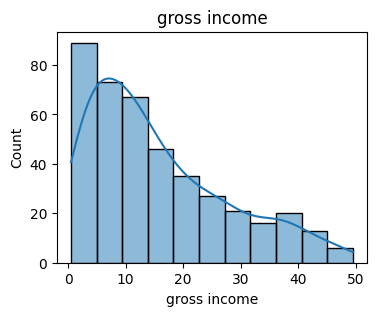

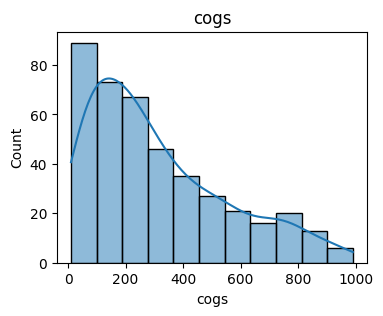

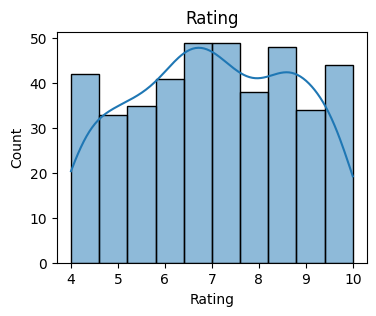

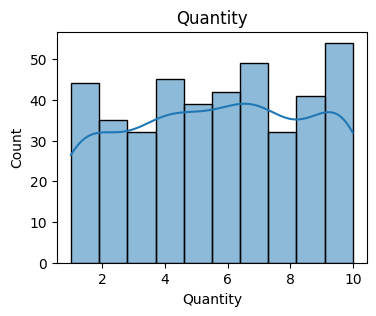

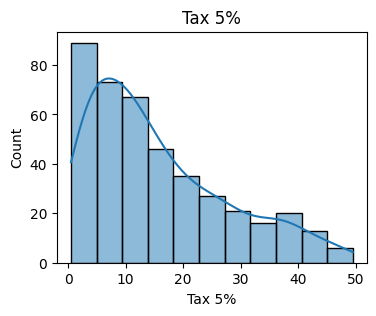

In [203]:

Num_Col = df[['Unit price','Total','gross income','cogs','Rating','Quantity','Tax 5%']]

for i in Num_Col.columns:
    plt.figure(figsize=(4, 3))
    plt.title(i)
    sns.histplot(Num_Col[i], kde=True)
    plt.show()

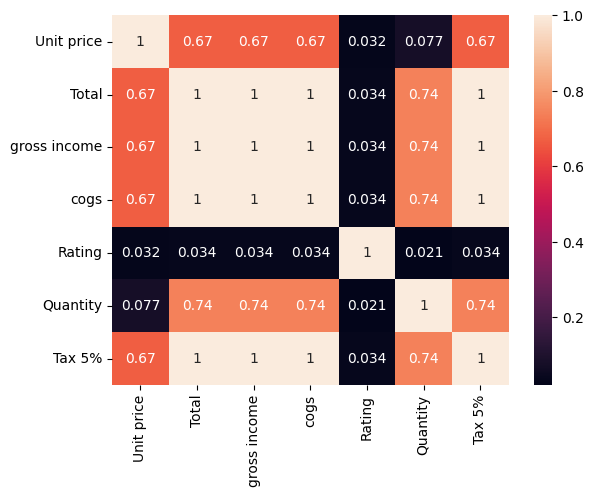

In [205]:
corr = Num_Col.corr(method = 'spearman')

sns.heatmap(corr, annot = True)
plt.show()

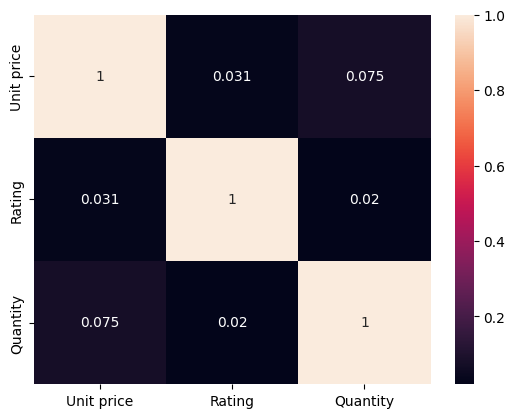

In [207]:
Normal_Col= Num_Col[['Unit price','Rating','Quantity']]
corr = Normal_Col.corr(method = 'pearson')

sns.heatmap(corr, annot = True)
plt.show()